In [1]:
# first to run everytime
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [11]:
def SED_flat(speclist, photlist, flatlist, save=None):
    import matplotlib.pyplot as plt
    from matplotlib import gridspec
    import numpy as np
    from astropy.io import ascii
    import os
    
    fig = plt.figure(figsize=(10,7)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1], hspace=0)
    axes = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1])]
    
    for spec in speclist:
        data = ascii.read(spec)
        colname = data.colnames
        axes[0].plot(data[colname[0]], data[colname[1]], color='b', linewidth=0.7)
        
    for phot in photlist:
        data = ascii.read(phot, data_start=4)
        colname = data.colnames
        if len(colname) == 3:
            axes[0].errorbar(data[colname[0]], data[colname[1]], yerr=data[colname[2]],
                             color='DimGray', marker='s', markersize=4, linestyle='None')
        elif len(colname) == 5:
            axes[0].errorbar(data[colname[1]], data[colname[2]], yerr=data[colname[3]],
                             color='DimGray', marker='s', markersize=4, linestyle='None')
        else:
            axes[0].plot(data[colname[0]], data[colname[1]],
                         color='DimGray', marker='s', markersize=4, linestyle='None')
    for flat in flatlist:
        data = ascii.read(flat)
        colname = data.colnames
        axes[1].plot(data[colname[0]], data[colname[1]], color='b', linewidth=0.7)
        
    fig.text(-0.02, 0.5, 'Flux Density [Jy]',va='center', rotation='vertical', fontsize=18)
    axes[0].set_yscale('log')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    axes[0].set_xticklabels([])
    axes[0].tick_params('both',labelsize=16,width=1.5,which='major',length=6)
    axes[0].tick_params('both',labelsize=16,width=1.5,which='minor',length=4)
    axes[0].tick_params('x', direction='in', which='both')
    axes[0].minorticks_on()
    [axes[0].spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
    
    axes[1].yaxis.tick_right()
    axes[1].minorticks_on()
    axes[1].set_xlabel(r'Wavelength [$\mu$m]', fontsize=18)
    axes[1].tick_params('both',labelsize=16,width=1.5,which='major',length=6)
    axes[1].tick_params('both',labelsize=16,width=1.5,which='minor',length=4)
    [axes[1].spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]

    if save:
        fig.savefig(save, format='pdf', dpi=300, bbox_inches='tight')

In [12]:
archive_dir = '/Volumes/SD-Mac/CDF_archive_v2/'
speclist = [archive_dir+'BHR71/pacs/data/BHR71_pacs_weighted.txt',
            archive_dir+'BHR71/spire/data/BHR71_spire_corrected.txt']
photlist = [archive_dir+'BHR71/pacs/data/BHR71_pacs_phot.txt',
            archive_dir+'BHR71/spire/data/BHR71_spire_phot.txt']
flatlist = [archive_dir+'BHR71/pacs/advanced_products/BHR71_pacs_weighted_flat_spectrum.txt',
            archive_dir+'BHR71/spire/advanced_products/BHR71_spire_corrected_flat_spectrum.txt']


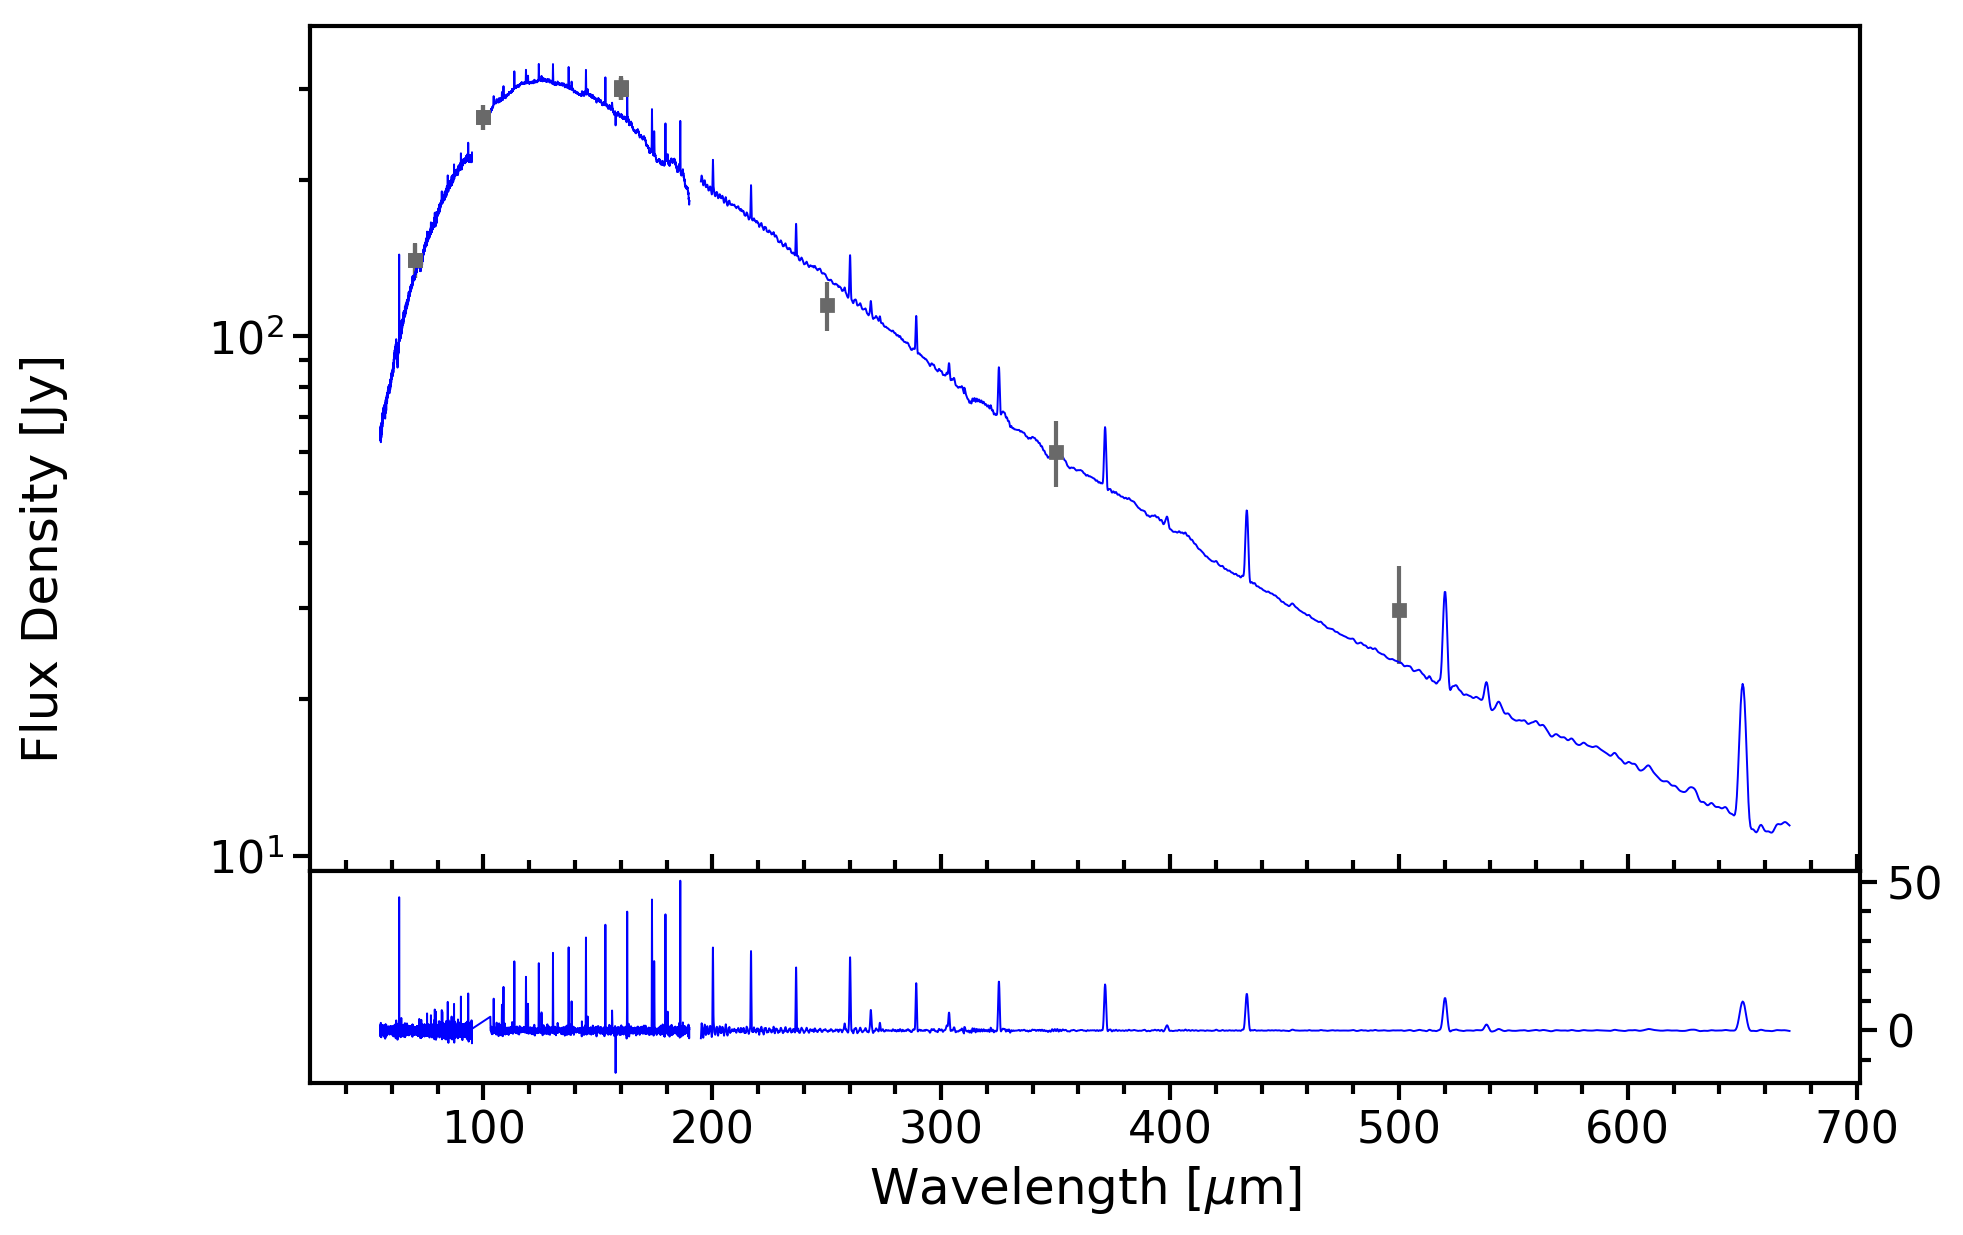

In [13]:
SED_flat(speclist, photlist, flatlist, save='/Users/yaolun/test/BHR71_sed.pdf')